<a href="https://colab.research.google.com/github/Sanyam-Jain1/Plane_disease_classficiation/blob/main/mask_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python matplotlib



  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-c6p8rck_
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-c6p8rck_
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=fd5c383c8dba1f88560adfc5103cd159f9858be571508af120c34ceba91bc676
  Stored in directory: /tmp/pip-ephem-wheel-cache-cjfar_di/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


In [ ]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth


--2025-05-26 07:19:45--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.124, 108.157.254.121, 108.157.254.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   153MB/s    in 20s     

2025-05-26 07:20:05 (122 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [ ]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth


--2025-05-26 07:23:37--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.124, 108.157.254.121, 108.157.254.102, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘sam_vit_b_01ec64.pth’

sam_vit_b_01ec64.pt 100%[===================>] 357.67M  36.0MB/s    in 6.7s    

2025-05-26 07:23:44 (53.7 MB/s) - ‘sam_vit_b_01ec64.pth’ saved [375042383/375042383]



In [ ]:
model_type = "vit_b"
checkpoint_path = "sam_vit_b_01ec64.pth"


In [ ]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[model_type](checkpoint=checkpoint_path)
sam.to("cuda" if torch.cuda.is_available() else "cpu")


Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()
    )


In [ ]:
predictor = SamPredictor(sam)


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 0a0dbf1f-1131-496f-b337-169ec6693e6f___NREC_B.Spot 9241.JPG to 0a0dbf1f-1131-496f-b337-169ec6693e6f___NREC_B.Spot 9241.JPG


In [ ]:
image_path = next(iter(uploaded))
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)


In [ ]:
image_path = next(iter(uploaded))
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)

[x_min, y_min, width, height] = [25, 102, 23, 31]

x_min = 25
y_min = 102
width = 23
height = 31

x_max = x_min + width  # 25 + 23 = 48
y_max = y_min + height # 102 + 31 = 133

box = [25, 102, 48, 133]
boxes = np.array([[25, 102, 48, 133]])


In [ ]:
transformed_boxes = predictor.transform.apply_boxes_torch(
    torch.tensor(boxes, dtype=torch.float32, device=predictor.device),
    image.shape[:2]
)
masks, scores, logits = predictor.predict_torch(
    point_coords=None,
    point_labels=None,
    boxes=transformed_boxes,
    multimask_output=False
)


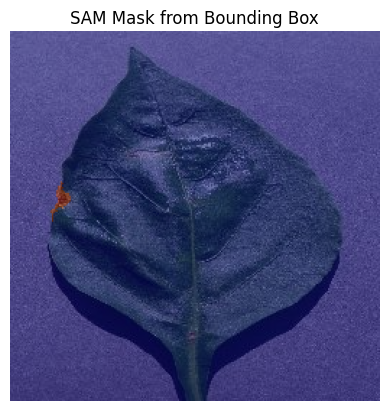

In [ ]:
import cv2
import matplotlib.pyplot as plt

binary_mask = (masks[0].cpu().numpy()[0] * 255).astype(np.uint8)
cv2.imwrite("mask_0.png", binary_mask)

plt.imshow(image)
plt.imshow(binary_mask, alpha=0.5, cmap='jet')
plt.axis("off")
plt.title("SAM Mask from Bounding Box")
plt.show()


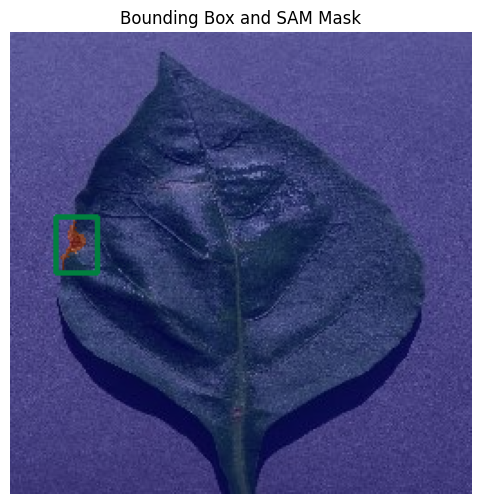

In [ ]:
image_with_box = image.copy()
cv2.rectangle(
    image_with_box,
    (box[0], box[1]),  # top-left
    (box[2], box[3]),  # bottom-right
    color=(0, 255, 0),  # Green box
    thickness=2
)
mask_np = masks[0].cpu().numpy()[0]  # Shape: (H, W), values 0 or 1

# --- Display: Original Image + Box + Mask Overlay
plt.figure(figsize=(10, 6))
plt.imshow(image_with_box)
plt.imshow(mask_np, alpha=0.5, cmap='jet')  # Overlay the mask
plt.title("Bounding Box and SAM Mask")
plt.axis("off")
plt.show()


In [ ]:
import json

# Load your annotation file
with open("/content/crop_dataset_coco.json", "r") as f:
    coco = json.load(f)

images = {img["id"]: img for img in coco["images"]}
annotations = coco["annotations"]


In [ ]:
annotations

[{'id': 0,
  'image_id': 0,
  'category_id': 0,
  'bbox': [43, 123, 62, 123],
  'iscrowd': 0},
 {'id': 1,
  'image_id': 0,
  'category_id': 0,
  'bbox': [141, 57, 100, 105],
  'iscrowd': 0},
 {'id': 2,
  'image_id': 1,
  'category_id': 0,
  'bbox': [25, 102, 23, 31],
  'iscrowd': 0},
 {'id': 3,
  'image_id': 2,
  'category_id': 0,
  'bbox': [85, 78, 156, 134],
  'iscrowd': 0},
 {'id': 4,
  'image_id': 3,
  'category_id': 0,
  'bbox': [87, 12, 32, 46],
  'iscrowd': 0},
 {'id': 5,
  'image_id': 4,
  'category_id': 0,
  'bbox': [2, 112, 81, 110],
  'iscrowd': 0},
 {'id': 6,
  'image_id': 5,
  'category_id': 0,
  'bbox': [107, 21, 102, 69],
  'iscrowd': 0},
 {'id': 7,
  'image_id': 5,
  'category_id': 0,
  'bbox': [81, 106, 48, 47],
  'iscrowd': 0},
 {'id': 8,
  'image_id': 6,
  'category_id': 0,
  'bbox': [150, 50, 58, 77],
  'iscrowd': 0},
 {'id': 9,
  'image_id': 6,
  'category_id': 0,
  'bbox': [67, 95, 64, 60],
  'iscrowd': 0},
 {'id': 10,
  'image_id': 6,
  'category_id': 0,
  'bbox'

In [ ]:
import zipfile
import os

zip_path = "/content/Dataset.zip"  # replace with actual file name if different
extract_dir = "/content/Dataset"  # target directory to extract to

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Dataset unzipped to:", extract_dir)


✅ Dataset unzipped to: /content/Dataset


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [ ]:
from pycocotools import mask as mask_utils

save_json_every = 100
output_json_path = "/content/coco_with_masks_clean2.json"
mask_save_dir = "/content/sam_masks_clean2"
os.makedirs(mask_save_dir, exist_ok=True)

for idx, ann in enumerate(tqdm(annotations)):

    # Skip already processed annotations
    if "segmentation" in ann:
        continue

    img_meta = images[ann["image_id"]]
    image_path = img_meta["file_name"]

    # Load and prepare image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Skipping (not found): {image_path}")
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    predictor.set_image(image)

    # Convert box to [x_min, y_min, x_max, y_max]
    x, y, w, h = ann["bbox"]
    box = np.array([[x, y, x + w, y + h]])

    # Transform box and predict mask
    try:
        transformed_box = predictor.transform.apply_boxes_torch(
            torch.tensor(box, dtype=torch.float32, device=predictor.device),
            image.shape[:2]
        )
        masks, _, _ = predictor.predict_torch(
            point_coords=None,
            point_labels=None,
            boxes=transformed_box,
            multimask_output=False
        )
    except Exception as e:
        print(f"Error in image {image_path}, annotation {ann['id']}: {e}")
        continue

    # Save mask as PNG (for inspection/debugging)
    binary_mask = (masks[0].cpu().numpy()[0] > 0.5).astype(np.uint8)
    mask_filename = f"mask_img{ann['image_id']}_ann{ann['id']}.png"
    mask_path = os.path.join(mask_save_dir, mask_filename)
    cv2.imwrite(mask_path, binary_mask * 255)

    # Encode mask as COCO RLE
    rle = mask_utils.encode(np.asfortranarray(binary_mask))
    rle["counts"] = rle["counts"].decode("utf-8")  # Convert bytes to str

    # Update annotation
    ann["segmentation"] = rle
    ann["iscrowd"] = 0  # Required for COCO RLE format

    # Periodic save of JSON
    if idx % save_json_every == 0 and idx > 0:
        with open(output_json_path, "w") as f:
            json.dump(coco, f)
        print(f"✅ Progress saved at annotation #{idx}")

# Final save after loop
with open(output_json_path, "w") as f:
    json.dump(coco, f)

print("✅ All done. Final COCO JSON with RLE masks saved.")


  0%|          | 101/23189 [00:42<3:12:07,  2.00it/s]

✅ Progress saved at annotation #100


  1%|          | 201/23189 [01:25<3:19:37,  1.92it/s]

✅ Progress saved at annotation #200


  1%|▏         | 301/23189 [02:09<3:13:55,  1.97it/s]

✅ Progress saved at annotation #300


  2%|▏         | 401/23189 [02:53<3:16:18,  1.93it/s]

✅ Progress saved at annotation #400


  2%|▏         | 501/23189 [03:37<3:17:47,  1.91it/s]

✅ Progress saved at annotation #500


  3%|▎         | 601/23189 [04:21<3:13:05,  1.95it/s]

✅ Progress saved at annotation #600


  3%|▎         | 701/23189 [05:05<3:09:58,  1.97it/s]

✅ Progress saved at annotation #700


  3%|▎         | 801/23189 [05:49<3:35:45,  1.73it/s]

✅ Progress saved at annotation #800


  4%|▍         | 901/23189 [06:33<3:09:02,  1.96it/s]

✅ Progress saved at annotation #900


  4%|▍         | 1001/23189 [07:17<3:08:00,  1.97it/s]

✅ Progress saved at annotation #1000


  5%|▍         | 1101/23189 [08:01<3:09:01,  1.95it/s]

✅ Progress saved at annotation #1100


  5%|▌         | 1201/23189 [08:45<3:08:58,  1.94it/s]

✅ Progress saved at annotation #1200


  6%|▌         | 1301/23189 [09:28<3:08:45,  1.93it/s]

✅ Progress saved at annotation #1300


  6%|▌         | 1401/23189 [10:12<3:07:43,  1.93it/s]

✅ Progress saved at annotation #1400


  6%|▋         | 1501/23189 [10:56<3:06:34,  1.94it/s]

✅ Progress saved at annotation #1500


  7%|▋         | 1601/23189 [11:40<3:28:01,  1.73it/s]

✅ Progress saved at annotation #1600


  7%|▋         | 1701/23189 [12:24<3:03:34,  1.95it/s]

✅ Progress saved at annotation #1700


  8%|▊         | 1801/23189 [13:08<3:04:52,  1.93it/s]

✅ Progress saved at annotation #1800


  8%|▊         | 1901/23189 [13:52<3:03:23,  1.93it/s]

✅ Progress saved at annotation #1900


  9%|▊         | 2001/23189 [14:36<3:02:26,  1.94it/s]

✅ Progress saved at annotation #2000


  9%|▉         | 2101/23189 [15:19<3:01:16,  1.94it/s]

✅ Progress saved at annotation #2100


  9%|▉         | 2201/23189 [16:03<2:58:56,  1.95it/s]

✅ Progress saved at annotation #2200


 10%|▉         | 2301/23189 [16:47<2:59:17,  1.94it/s]

✅ Progress saved at annotation #2300


 10%|█         | 2401/23189 [17:31<3:23:17,  1.70it/s]

✅ Progress saved at annotation #2400


 11%|█         | 2501/23189 [18:15<2:56:11,  1.96it/s]

✅ Progress saved at annotation #2500


 11%|█         | 2601/23189 [18:59<2:57:02,  1.94it/s]

✅ Progress saved at annotation #2600


 12%|█▏        | 2701/23189 [19:43<2:58:12,  1.92it/s]

✅ Progress saved at annotation #2700


 12%|█▏        | 2801/23189 [20:27<2:55:46,  1.93it/s]

✅ Progress saved at annotation #2800


 13%|█▎        | 2901/23189 [21:11<3:15:15,  1.73it/s]

✅ Progress saved at annotation #2900


 13%|█▎        | 3001/23189 [21:54<2:54:26,  1.93it/s]

✅ Progress saved at annotation #3000


 13%|█▎        | 3101/23189 [22:38<2:54:52,  1.91it/s]

✅ Progress saved at annotation #3100


 14%|█▍        | 3201/23189 [23:22<2:51:23,  1.94it/s]

✅ Progress saved at annotation #3200


 14%|█▍        | 3301/23189 [24:06<2:51:57,  1.93it/s]

✅ Progress saved at annotation #3300


 15%|█▍        | 3401/23189 [24:50<2:53:05,  1.91it/s]

✅ Progress saved at annotation #3400


 15%|█▌        | 3501/23189 [25:34<2:51:22,  1.91it/s]

✅ Progress saved at annotation #3500


 16%|█▌        | 3601/23189 [26:18<2:50:02,  1.92it/s]

✅ Progress saved at annotation #3600


 16%|█▌        | 3701/23189 [27:02<3:13:16,  1.68it/s]

✅ Progress saved at annotation #3700


 16%|█▋        | 3801/23189 [27:46<2:46:50,  1.94it/s]

✅ Progress saved at annotation #3800


 17%|█▋        | 3901/23189 [28:30<2:48:43,  1.91it/s]

✅ Progress saved at annotation #3900


 17%|█▋        | 4001/23189 [29:14<2:47:00,  1.91it/s]

✅ Progress saved at annotation #4000


 18%|█▊        | 4101/23189 [29:58<2:45:03,  1.93it/s]

✅ Progress saved at annotation #4100


 18%|█▊        | 4201/23189 [30:42<3:10:34,  1.66it/s]

✅ Progress saved at annotation #4200


 19%|█▊        | 4301/23189 [31:25<2:42:42,  1.93it/s]

✅ Progress saved at annotation #4300


 19%|█▉        | 4401/23189 [32:09<2:43:43,  1.91it/s]

✅ Progress saved at annotation #4400


 19%|█▉        | 4501/23189 [32:53<2:43:39,  1.90it/s]

✅ Progress saved at annotation #4500


 20%|█▉        | 4601/23189 [33:37<2:42:26,  1.91it/s]

✅ Progress saved at annotation #4600


 20%|██        | 4701/23189 [34:21<3:03:35,  1.68it/s]

✅ Progress saved at annotation #4700


 21%|██        | 4801/23189 [35:05<2:40:19,  1.91it/s]

✅ Progress saved at annotation #4800


 21%|██        | 4901/23189 [35:49<2:39:13,  1.91it/s]

✅ Progress saved at annotation #4900


 22%|██▏       | 5001/23189 [36:33<2:37:58,  1.92it/s]

✅ Progress saved at annotation #5000


 22%|██▏       | 5101/23189 [37:17<2:37:18,  1.92it/s]

✅ Progress saved at annotation #5100


 22%|██▏       | 5201/23189 [38:01<3:00:05,  1.66it/s]

✅ Progress saved at annotation #5200


 23%|██▎       | 5301/23189 [38:45<2:35:45,  1.91it/s]

✅ Progress saved at annotation #5300


 23%|██▎       | 5401/23189 [39:29<2:35:00,  1.91it/s]

✅ Progress saved at annotation #5400


 24%|██▎       | 5501/23189 [40:12<2:33:54,  1.92it/s]

✅ Progress saved at annotation #5500


 24%|██▍       | 5601/23189 [40:56<2:32:58,  1.92it/s]

✅ Progress saved at annotation #5600


 25%|██▍       | 5701/23189 [41:40<2:57:50,  1.64it/s]

✅ Progress saved at annotation #5700


 25%|██▌       | 5801/23189 [42:24<2:31:55,  1.91it/s]

✅ Progress saved at annotation #5800


 25%|██▌       | 5901/23189 [43:08<2:32:31,  1.89it/s]

✅ Progress saved at annotation #5900


 26%|██▌       | 6001/23189 [43:52<2:29:53,  1.91it/s]

✅ Progress saved at annotation #6000


 26%|██▋       | 6101/23189 [44:36<2:27:41,  1.93it/s]

✅ Progress saved at annotation #6100


 27%|██▋       | 6201/23189 [45:20<2:51:50,  1.65it/s]

✅ Progress saved at annotation #6200


 27%|██▋       | 6301/23189 [46:04<2:27:55,  1.90it/s]

✅ Progress saved at annotation #6300


 28%|██▊       | 6401/23189 [46:47<2:27:05,  1.90it/s]

✅ Progress saved at annotation #6400


 28%|██▊       | 6501/23189 [47:31<2:27:02,  1.89it/s]

✅ Progress saved at annotation #6500


 28%|██▊       | 6601/23189 [48:15<2:25:12,  1.90it/s]

✅ Progress saved at annotation #6600


 29%|██▉       | 6701/23189 [48:59<2:48:04,  1.64it/s]

✅ Progress saved at annotation #6700


 29%|██▉       | 6801/23189 [49:43<2:23:51,  1.90it/s]

✅ Progress saved at annotation #6800


 30%|██▉       | 6901/23189 [50:27<2:22:50,  1.90it/s]

✅ Progress saved at annotation #6900


 30%|███       | 7001/23189 [51:11<2:21:34,  1.91it/s]

✅ Progress saved at annotation #7000


 31%|███       | 7101/23189 [51:55<2:21:59,  1.89it/s]

✅ Progress saved at annotation #7100


 31%|███       | 7201/23189 [52:39<2:41:32,  1.65it/s]

✅ Progress saved at annotation #7200


 31%|███▏      | 7301/23189 [53:23<2:19:38,  1.90it/s]

✅ Progress saved at annotation #7300


 32%|███▏      | 7401/23189 [54:07<2:18:08,  1.90it/s]

✅ Progress saved at annotation #7400


 32%|███▏      | 7501/23189 [54:51<2:19:11,  1.88it/s]

✅ Progress saved at annotation #7500


 33%|███▎      | 7601/23189 [55:35<2:17:04,  1.90it/s]

✅ Progress saved at annotation #7600


 33%|███▎      | 7701/23189 [56:19<2:33:26,  1.68it/s]

✅ Progress saved at annotation #7700


 34%|███▎      | 7801/23189 [57:03<2:16:32,  1.88it/s]

✅ Progress saved at annotation #7800


 34%|███▍      | 7901/23189 [57:47<2:14:49,  1.89it/s]

✅ Progress saved at annotation #7900


 35%|███▍      | 8001/23189 [58:30<2:13:19,  1.90it/s]

✅ Progress saved at annotation #8000


 35%|███▍      | 8101/23189 [59:14<2:14:06,  1.88it/s]

✅ Progress saved at annotation #8100


 35%|███▌      | 8201/23189 [59:58<2:11:15,  1.90it/s]

✅ Progress saved at annotation #8200


 36%|███▌      | 8301/23189 [1:00:42<2:10:50,  1.90it/s]

✅ Progress saved at annotation #8300


 36%|███▌      | 8401/23189 [1:01:26<2:32:52,  1.61it/s]

✅ Progress saved at annotation #8400


 37%|███▋      | 8501/23189 [1:02:10<2:08:47,  1.90it/s]

✅ Progress saved at annotation #8500


 37%|███▋      | 8601/23189 [1:02:54<2:09:37,  1.88it/s]

✅ Progress saved at annotation #8600


 38%|███▊      | 8701/23189 [1:03:38<2:08:20,  1.88it/s]

✅ Progress saved at annotation #8700


 38%|███▊      | 8801/23189 [1:04:22<2:07:13,  1.88it/s]

✅ Progress saved at annotation #8800


 38%|███▊      | 8901/23189 [1:05:06<2:27:35,  1.61it/s]

✅ Progress saved at annotation #8900


 39%|███▉      | 9001/23189 [1:05:50<2:06:26,  1.87it/s]

✅ Progress saved at annotation #9000


 39%|███▉      | 9101/23189 [1:06:34<2:06:48,  1.85it/s]

✅ Progress saved at annotation #9100


 40%|███▉      | 9201/23189 [1:07:18<2:04:40,  1.87it/s]

✅ Progress saved at annotation #9200


 40%|████      | 9301/23189 [1:08:02<2:03:35,  1.87it/s]

✅ Progress saved at annotation #9300


 41%|████      | 9401/23189 [1:08:46<2:02:25,  1.88it/s]

✅ Progress saved at annotation #9400


 41%|████      | 9501/23189 [1:09:30<2:01:42,  1.87it/s]

✅ Progress saved at annotation #9500


 41%|████▏     | 9601/23189 [1:10:14<2:19:59,  1.62it/s]

✅ Progress saved at annotation #9600


 42%|████▏     | 9701/23189 [1:10:58<1:59:56,  1.87it/s]

✅ Progress saved at annotation #9700


 42%|████▏     | 9801/23189 [1:11:42<1:59:21,  1.87it/s]

✅ Progress saved at annotation #9800


 43%|████▎     | 9901/23189 [1:12:26<1:56:52,  1.89it/s]

✅ Progress saved at annotation #9900


 43%|████▎     | 10001/23189 [1:13:10<1:58:06,  1.86it/s]

✅ Progress saved at annotation #10000


 44%|████▎     | 10101/23189 [1:13:54<1:55:59,  1.88it/s]

✅ Progress saved at annotation #10100


 44%|████▍     | 10201/23189 [1:14:38<1:56:07,  1.86it/s]

✅ Progress saved at annotation #10200


 44%|████▍     | 10301/23189 [1:15:22<2:13:32,  1.61it/s]

✅ Progress saved at annotation #10300


 45%|████▍     | 10401/23189 [1:16:06<1:55:12,  1.85it/s]

✅ Progress saved at annotation #10400


 45%|████▌     | 10501/23189 [1:16:50<1:53:18,  1.87it/s]

✅ Progress saved at annotation #10500


 46%|████▌     | 10601/23189 [1:17:34<1:53:24,  1.85it/s]

✅ Progress saved at annotation #10600


 46%|████▌     | 10701/23189 [1:18:18<1:53:19,  1.84it/s]

✅ Progress saved at annotation #10700


 47%|████▋     | 10801/23189 [1:19:02<1:51:15,  1.86it/s]

✅ Progress saved at annotation #10800


 47%|████▋     | 10901/23189 [1:19:46<1:51:02,  1.84it/s]

✅ Progress saved at annotation #10900


 47%|████▋     | 11001/23189 [1:20:30<2:07:25,  1.59it/s]

✅ Progress saved at annotation #11000


 48%|████▊     | 11101/23189 [1:21:14<1:48:52,  1.85it/s]

✅ Progress saved at annotation #11100


 48%|████▊     | 11201/23189 [1:21:58<1:49:18,  1.83it/s]

✅ Progress saved at annotation #11200


 49%|████▊     | 11301/23189 [1:22:42<1:48:08,  1.83it/s]

✅ Progress saved at annotation #11300


 49%|████▉     | 11401/23189 [1:23:26<1:45:43,  1.86it/s]

✅ Progress saved at annotation #11400


 50%|████▉     | 11501/23189 [1:24:10<1:43:53,  1.88it/s]

✅ Progress saved at annotation #11500


 50%|█████     | 11601/23189 [1:24:54<1:43:36,  1.86it/s]

✅ Progress saved at annotation #11600


 50%|█████     | 11701/23189 [1:25:38<2:00:29,  1.59it/s]

✅ Progress saved at annotation #11700


 51%|█████     | 11801/23189 [1:26:22<1:42:59,  1.84it/s]

✅ Progress saved at annotation #11800


 51%|█████▏    | 11901/23189 [1:27:06<1:42:39,  1.83it/s]

✅ Progress saved at annotation #11900


 52%|█████▏    | 12001/23189 [1:27:50<1:40:08,  1.86it/s]

✅ Progress saved at annotation #12000


 52%|█████▏    | 12101/23189 [1:28:34<1:41:51,  1.81it/s]

✅ Progress saved at annotation #12100


 53%|█████▎    | 12201/23189 [1:29:18<1:38:38,  1.86it/s]

✅ Progress saved at annotation #12200


 53%|█████▎    | 12301/23189 [1:30:02<1:37:48,  1.86it/s]

✅ Progress saved at annotation #12300


 53%|█████▎    | 12401/23189 [1:30:46<1:52:52,  1.59it/s]

✅ Progress saved at annotation #12400


 54%|█████▍    | 12501/23189 [1:31:30<1:35:18,  1.87it/s]

✅ Progress saved at annotation #12500


 54%|█████▍    | 12601/23189 [1:32:14<1:35:24,  1.85it/s]

✅ Progress saved at annotation #12600


 55%|█████▍    | 12701/23189 [1:32:58<1:34:53,  1.84it/s]

✅ Progress saved at annotation #12700


 55%|█████▌    | 12801/23189 [1:33:42<1:33:39,  1.85it/s]

✅ Progress saved at annotation #12800


 56%|█████▌    | 12901/23189 [1:34:26<1:32:44,  1.85it/s]

✅ Progress saved at annotation #12900


 56%|█████▌    | 13001/23189 [1:35:10<1:32:23,  1.84it/s]

✅ Progress saved at annotation #13000


 56%|█████▋    | 13101/23189 [1:35:55<1:48:13,  1.55it/s]

✅ Progress saved at annotation #13100


 57%|█████▋    | 13201/23189 [1:36:38<1:29:13,  1.87it/s]

✅ Progress saved at annotation #13200


 57%|█████▋    | 13301/23189 [1:37:23<1:39:39,  1.65it/s]

✅ Progress saved at annotation #13300


 58%|█████▊    | 13401/23189 [1:38:07<1:28:47,  1.84it/s]

✅ Progress saved at annotation #13400


 58%|█████▊    | 13501/23189 [1:38:51<1:27:09,  1.85it/s]

✅ Progress saved at annotation #13500


 59%|█████▊    | 13601/23189 [1:39:35<1:27:21,  1.83it/s]

✅ Progress saved at annotation #13600


 59%|█████▉    | 13701/23189 [1:40:19<1:25:59,  1.84it/s]

✅ Progress saved at annotation #13700


 60%|█████▉    | 13801/23189 [1:41:03<1:29:01,  1.76it/s]

✅ Progress saved at annotation #13800


 60%|█████▉    | 13901/23189 [1:41:47<1:23:42,  1.85it/s]

✅ Progress saved at annotation #13900


 60%|██████    | 14001/23189 [1:42:31<1:38:09,  1.56it/s]

✅ Progress saved at annotation #14000


 61%|██████    | 14101/23189 [1:43:15<1:22:16,  1.84it/s]

✅ Progress saved at annotation #14100


 61%|██████    | 14201/23189 [1:43:59<1:21:22,  1.84it/s]

✅ Progress saved at annotation #14200


 62%|██████▏   | 14301/23189 [1:44:43<1:20:25,  1.84it/s]

✅ Progress saved at annotation #14300


 62%|██████▏   | 14401/23189 [1:45:27<1:19:28,  1.84it/s]

✅ Progress saved at annotation #14400


 63%|██████▎   | 14501/23189 [1:46:11<1:18:31,  1.84it/s]

✅ Progress saved at annotation #14500


 63%|██████▎   | 14601/23189 [1:46:56<1:17:51,  1.84it/s]

✅ Progress saved at annotation #14600


 63%|██████▎   | 14701/23189 [1:47:40<1:31:03,  1.55it/s]

✅ Progress saved at annotation #14700


 64%|██████▍   | 14801/23189 [1:48:24<1:16:26,  1.83it/s]

✅ Progress saved at annotation #14800


 64%|██████▍   | 14901/23189 [1:49:08<1:19:21,  1.74it/s]

✅ Progress saved at annotation #14900


 65%|██████▍   | 15001/23189 [1:49:52<1:13:48,  1.85it/s]

✅ Progress saved at annotation #15000


 65%|██████▌   | 15101/23189 [1:50:36<1:14:02,  1.82it/s]

✅ Progress saved at annotation #15100


 66%|██████▌   | 15201/23189 [1:51:20<1:12:47,  1.83it/s]

✅ Progress saved at annotation #15200


 66%|██████▌   | 15301/23189 [1:52:04<1:11:31,  1.84it/s]

✅ Progress saved at annotation #15300


 66%|██████▋   | 15401/23189 [1:52:48<1:10:53,  1.83it/s]

✅ Progress saved at annotation #15400


 67%|██████▋   | 15501/23189 [1:53:32<1:09:48,  1.84it/s]

✅ Progress saved at annotation #15500


 67%|██████▋   | 15601/23189 [1:54:16<1:20:43,  1.57it/s]

✅ Progress saved at annotation #15600


 68%|██████▊   | 15701/23189 [1:55:00<1:08:13,  1.83it/s]

✅ Progress saved at annotation #15700


 68%|██████▊   | 15801/23189 [1:55:45<1:07:52,  1.81it/s]

✅ Progress saved at annotation #15800


 69%|██████▊   | 15901/23189 [1:56:29<1:07:08,  1.81it/s]

✅ Progress saved at annotation #15900


 69%|██████▉   | 16001/23189 [1:57:13<1:05:45,  1.82it/s]

✅ Progress saved at annotation #16000


 69%|██████▉   | 16101/23189 [1:57:57<1:05:18,  1.81it/s]

✅ Progress saved at annotation #16100


 70%|██████▉   | 16201/23189 [1:58:41<1:04:12,  1.81it/s]

✅ Progress saved at annotation #16200


 70%|███████   | 16301/23189 [1:59:25<1:03:15,  1.81it/s]

✅ Progress saved at annotation #16300


 71%|███████   | 16401/23189 [2:00:09<1:01:41,  1.83it/s]

✅ Progress saved at annotation #16400


 71%|███████   | 16501/23189 [2:00:54<1:13:03,  1.53it/s]

✅ Progress saved at annotation #16500


 72%|███████▏  | 16601/23189 [2:01:38<1:00:48,  1.81it/s]

✅ Progress saved at annotation #16600


 72%|███████▏  | 16701/23189 [2:02:22<1:04:11,  1.68it/s]

✅ Progress saved at annotation #16700


 72%|███████▏  | 16801/23189 [2:03:06<58:41,  1.81it/s]

✅ Progress saved at annotation #16800


 73%|███████▎  | 16901/23189 [2:03:50<58:37,  1.79it/s]

✅ Progress saved at annotation #16900


 73%|███████▎  | 17001/23189 [2:04:34<56:58,  1.81it/s]

✅ Progress saved at annotation #17000


 74%|███████▎  | 17101/23189 [2:05:18<55:49,  1.82it/s]

✅ Progress saved at annotation #17100


 74%|███████▍  | 17201/23189 [2:06:02<55:33,  1.80it/s]

✅ Progress saved at annotation #17200


 75%|███████▍  | 17301/23189 [2:06:46<54:18,  1.81it/s]

✅ Progress saved at annotation #17300


 75%|███████▌  | 17401/23189 [2:07:31<1:02:46,  1.54it/s]

✅ Progress saved at annotation #17400


 75%|███████▌  | 17501/23189 [2:08:15<52:36,  1.80it/s]

✅ Progress saved at annotation #17500


 76%|███████▌  | 17601/23189 [2:08:59<57:18,  1.63it/s]

✅ Progress saved at annotation #17600


 76%|███████▋  | 17701/23189 [2:09:43<50:15,  1.82it/s]

✅ Progress saved at annotation #17700


 77%|███████▋  | 17801/23189 [2:10:27<49:31,  1.81it/s]

✅ Progress saved at annotation #17800


 77%|███████▋  | 17901/23189 [2:11:11<48:52,  1.80it/s]

✅ Progress saved at annotation #17900


 78%|███████▊  | 18001/23189 [2:11:55<47:51,  1.81it/s]

✅ Progress saved at annotation #18000


 78%|███████▊  | 18101/23189 [2:12:39<47:21,  1.79it/s]

✅ Progress saved at annotation #18100


 78%|███████▊  | 18201/23189 [2:13:23<46:04,  1.80it/s]

✅ Progress saved at annotation #18200


 79%|███████▉  | 18301/23189 [2:14:08<53:54,  1.51it/s]

✅ Progress saved at annotation #18300


 79%|███████▉  | 18401/23189 [2:14:52<44:13,  1.80it/s]

✅ Progress saved at annotation #18400


 80%|███████▉  | 18501/23189 [2:15:36<50:59,  1.53it/s]

✅ Progress saved at annotation #18500


 80%|████████  | 18601/23189 [2:16:20<42:10,  1.81it/s]

✅ Progress saved at annotation #18600


 81%|████████  | 18701/23189 [2:17:04<42:53,  1.74it/s]

✅ Progress saved at annotation #18700


 81%|████████  | 18801/23189 [2:17:48<40:13,  1.82it/s]

✅ Progress saved at annotation #18800


 82%|████████▏ | 18901/23189 [2:18:32<40:00,  1.79it/s]

✅ Progress saved at annotation #18900


 82%|████████▏ | 19001/23189 [2:19:16<39:13,  1.78it/s]

✅ Progress saved at annotation #19000


 82%|████████▏ | 19101/23189 [2:20:00<38:04,  1.79it/s]

✅ Progress saved at annotation #19100


 83%|████████▎ | 19201/23189 [2:20:45<36:48,  1.81it/s]

✅ Progress saved at annotation #19200


 83%|████████▎ | 19301/23189 [2:21:29<35:34,  1.82it/s]

✅ Progress saved at annotation #19300


 84%|████████▎ | 19401/23189 [2:22:13<35:07,  1.80it/s]

✅ Progress saved at annotation #19400


 84%|████████▍ | 19501/23189 [2:22:57<34:22,  1.79it/s]

✅ Progress saved at annotation #19500


 85%|████████▍ | 19601/23189 [2:23:41<35:11,  1.70it/s]

✅ Progress saved at annotation #19600


 85%|████████▍ | 19701/23189 [2:24:25<32:20,  1.80it/s]

✅ Progress saved at annotation #19700


 85%|████████▌ | 19801/23189 [2:25:09<37:11,  1.52it/s]

✅ Progress saved at annotation #19800


 86%|████████▌ | 19901/23189 [2:25:53<30:38,  1.79it/s]

✅ Progress saved at annotation #19900


 86%|████████▋ | 20001/23189 [2:26:38<35:30,  1.50it/s]

✅ Progress saved at annotation #20000


 87%|████████▋ | 20101/23189 [2:27:22<28:34,  1.80it/s]

✅ Progress saved at annotation #20100


 87%|████████▋ | 20201/23189 [2:28:06<28:27,  1.75it/s]

✅ Progress saved at annotation #20200


 88%|████████▊ | 20301/23189 [2:28:50<26:54,  1.79it/s]

✅ Progress saved at annotation #20300


 88%|████████▊ | 20401/23189 [2:29:34<26:05,  1.78it/s]

✅ Progress saved at annotation #20400


 88%|████████▊ | 20501/23189 [2:30:18<24:56,  1.80it/s]

✅ Progress saved at annotation #20500


 89%|████████▉ | 20601/23189 [2:31:02<24:17,  1.78it/s]

✅ Progress saved at annotation #20600


 89%|████████▉ | 20701/23189 [2:31:47<23:04,  1.80it/s]

✅ Progress saved at annotation #20700


 90%|████████▉ | 20801/23189 [2:32:31<22:21,  1.78it/s]

✅ Progress saved at annotation #20800


 90%|█████████ | 20901/23189 [2:33:15<21:35,  1.77it/s]

✅ Progress saved at annotation #20900


 91%|█████████ | 21001/23189 [2:33:59<20:29,  1.78it/s]

✅ Progress saved at annotation #21000


 91%|█████████ | 21101/23189 [2:34:43<20:35,  1.69it/s]

✅ Progress saved at annotation #21100


 91%|█████████▏| 21201/23189 [2:35:27<18:38,  1.78it/s]

✅ Progress saved at annotation #21200


 92%|█████████▏| 21301/23189 [2:36:12<20:47,  1.51it/s]

✅ Progress saved at annotation #21300


 92%|█████████▏| 21401/23189 [2:36:56<16:58,  1.76it/s]

✅ Progress saved at annotation #21400


 93%|█████████▎| 21501/23189 [2:37:41<18:51,  1.49it/s]

✅ Progress saved at annotation #21500


 93%|█████████▎| 21601/23189 [2:38:25<14:48,  1.79it/s]

✅ Progress saved at annotation #21600


 94%|█████████▎| 21701/23189 [2:39:09<14:47,  1.68it/s]

✅ Progress saved at annotation #21700


 94%|█████████▍| 21801/23189 [2:39:53<12:57,  1.79it/s]

✅ Progress saved at annotation #21800


 94%|█████████▍| 21901/23189 [2:40:37<12:08,  1.77it/s]

✅ Progress saved at annotation #21900


 95%|█████████▍| 22001/23189 [2:41:21<11:03,  1.79it/s]

✅ Progress saved at annotation #22000


 95%|█████████▌| 22101/23189 [2:42:05<10:18,  1.76it/s]

✅ Progress saved at annotation #22100


 96%|█████████▌| 22201/23189 [2:42:49<09:20,  1.76it/s]

✅ Progress saved at annotation #22200


 96%|█████████▌| 22301/23189 [2:43:33<08:24,  1.76it/s]

✅ Progress saved at annotation #22300


 97%|█████████▋| 22401/23189 [2:44:18<07:22,  1.78it/s]

✅ Progress saved at annotation #22400


 97%|█████████▋| 22501/23189 [2:45:02<06:30,  1.76it/s]

✅ Progress saved at annotation #22500


 97%|█████████▋| 22601/23189 [2:45:46<05:28,  1.79it/s]

✅ Progress saved at annotation #22600


 98%|█████████▊| 22701/23189 [2:46:30<04:36,  1.76it/s]

✅ Progress saved at annotation #22700


 98%|█████████▊| 22801/23189 [2:47:14<03:36,  1.79it/s]

✅ Progress saved at annotation #22800


 99%|█████████▉| 22901/23189 [2:47:58<02:43,  1.76it/s]

✅ Progress saved at annotation #22900


 99%|█████████▉| 23001/23189 [2:48:42<01:59,  1.58it/s]

✅ Progress saved at annotation #23000


100%|█████████▉| 23101/23189 [2:49:27<00:49,  1.76it/s]

✅ Progress saved at annotation #23100


100%|██████████| 23189/23189 [2:50:05<00:00,  2.27it/s]


✅ All done. Final COCO JSON with RLE masks saved.


In [ ]:
!zip -r sam_masks_clean2.zip /content/sam_masks_clean2

# Download the zipped folder
from google.colab import files
files.download('sam_masks_clean2.zip')


Streaming output truncated to the last 5000 lines.
  adding: content/sam_masks_clean2/mask_img1591_ann2816.png (deflated 4%)
  adding: content/sam_masks_clean2/mask_img7489_ann12620.png (deflated 40%)
  adding: content/sam_masks_clean2/mask_img10230_ann19256.png (deflated 9%)
  adding: content/sam_masks_clean2/mask_img9152_ann17280.png (deflated 58%)
  adding: content/sam_masks_clean2/mask_img7831_ann13634.png (deflated 47%)
  adding: content/sam_masks_clean2/mask_img12179_ann23053.png (deflated 36%)
  adding: content/sam_masks_clean2/mask_img11161_ann21058.png (deflated 49%)
  adding: content/sam_masks_clean2/mask_img3339_ann5628.png (deflated 55%)
  adding: content/sam_masks_clean2/mask_img11190_ann21136.png (deflated 18%)
  adding: content/sam_masks_clean2/mask_img5964_ann10000.png (deflated 21%)
  adding: content/sam_masks_clean2/mask_img11393_ann21549.png (deflated 41%)
  adding: content/sam_masks_clean2/mask_img9026_ann16964.png (deflated 40%)
  adding: content/sam_masks_clean2/m

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

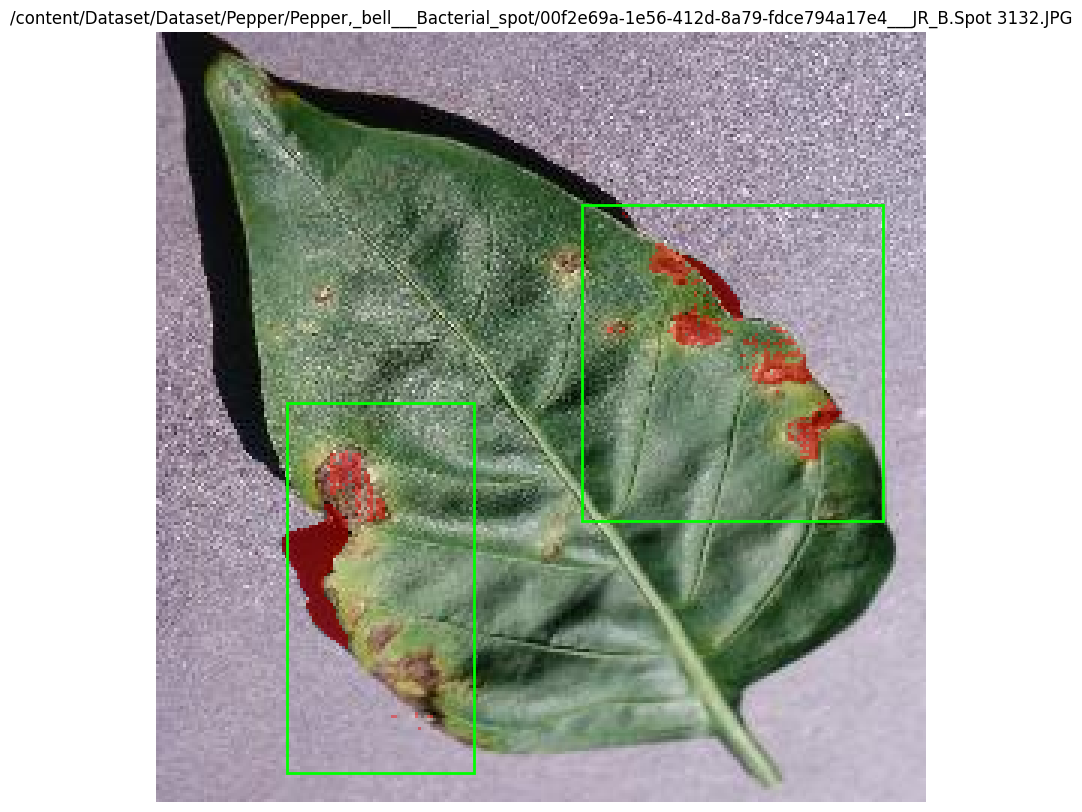

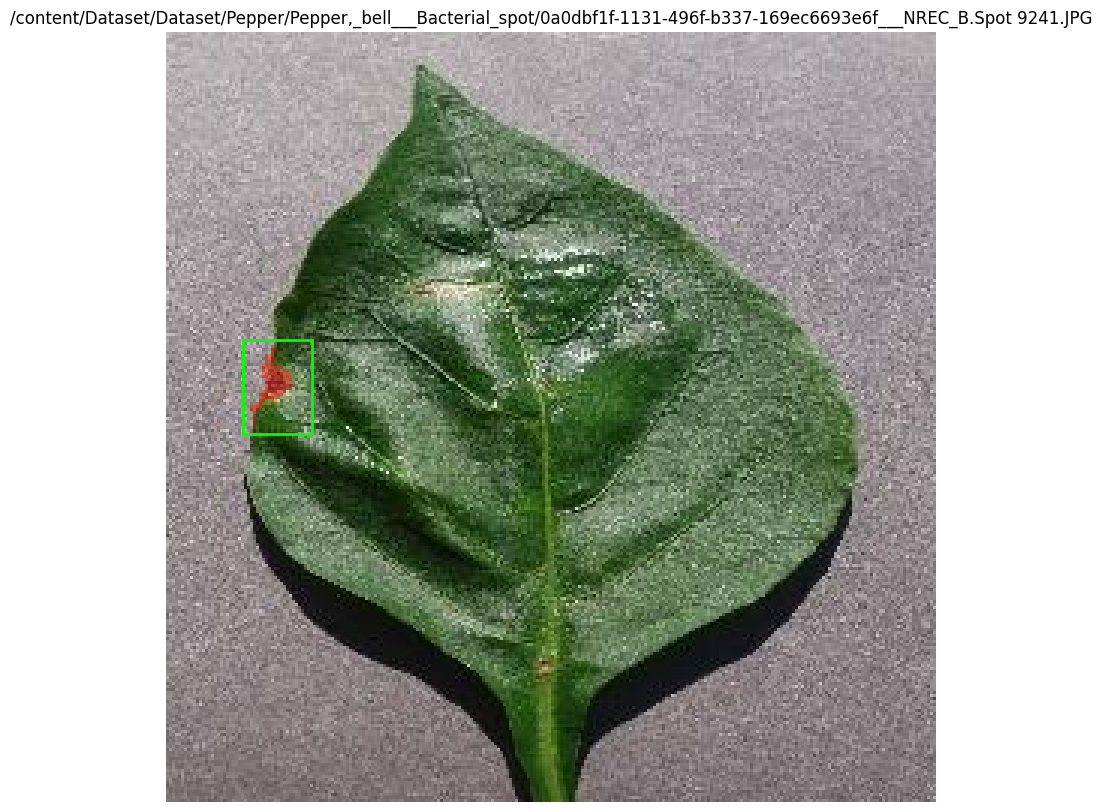

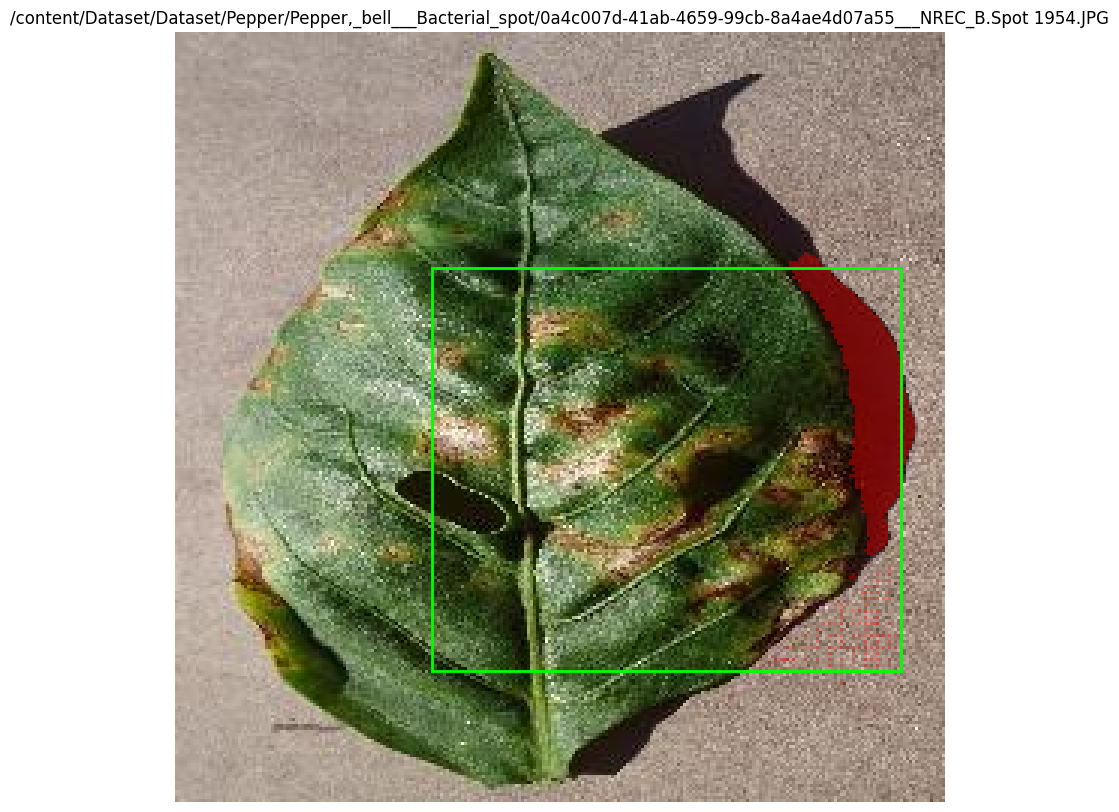

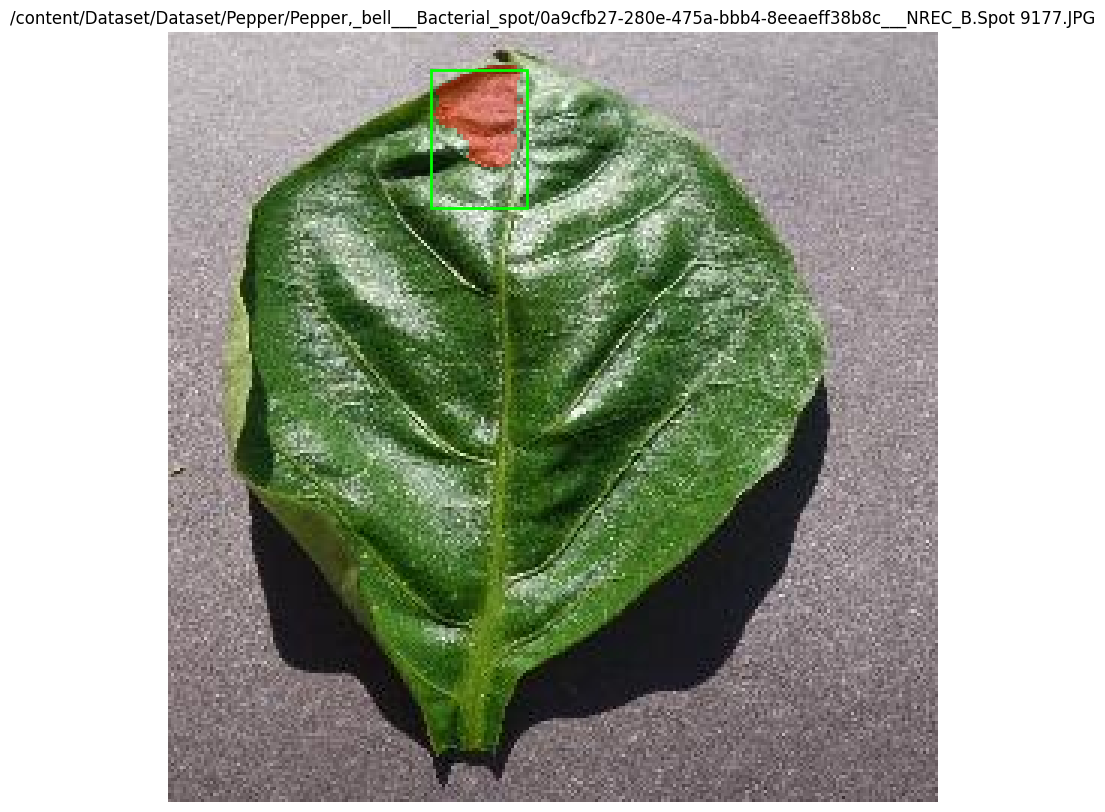

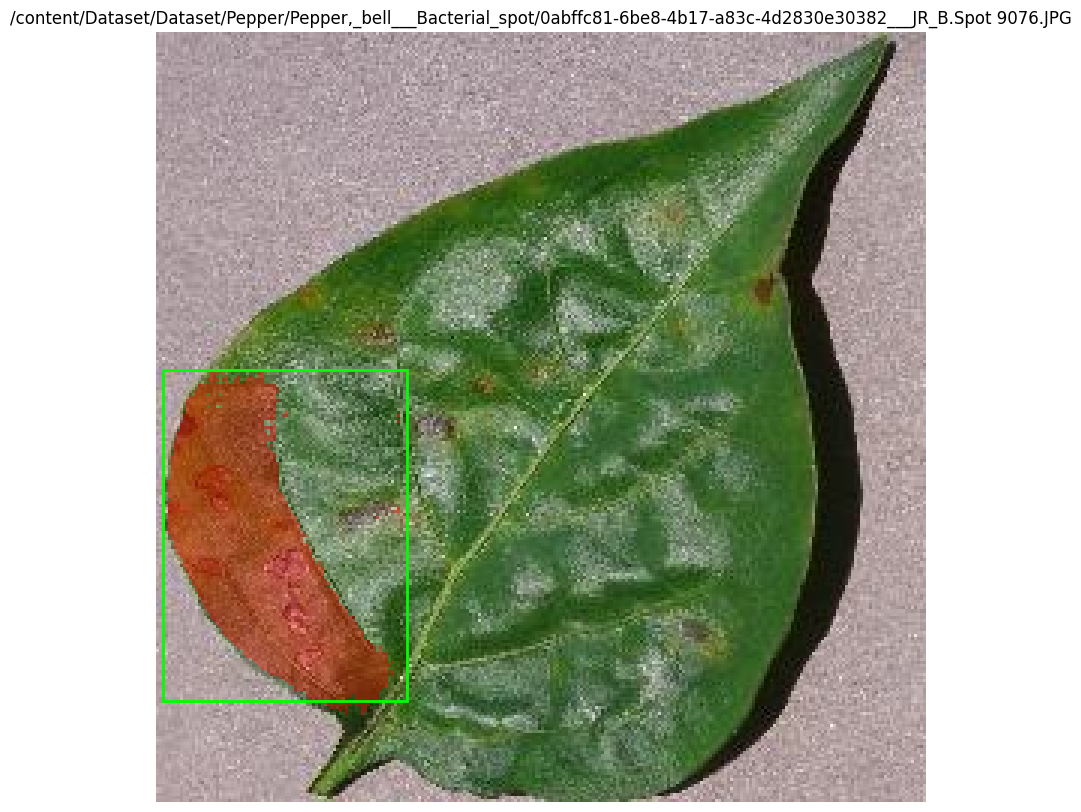

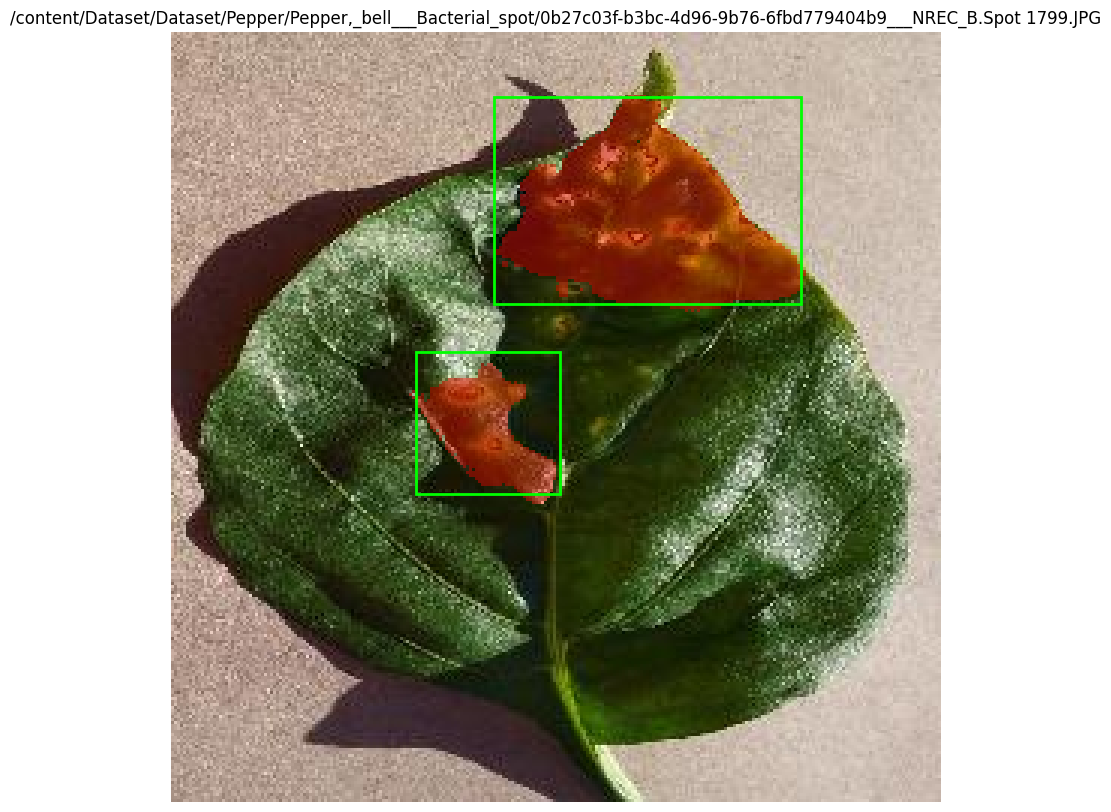

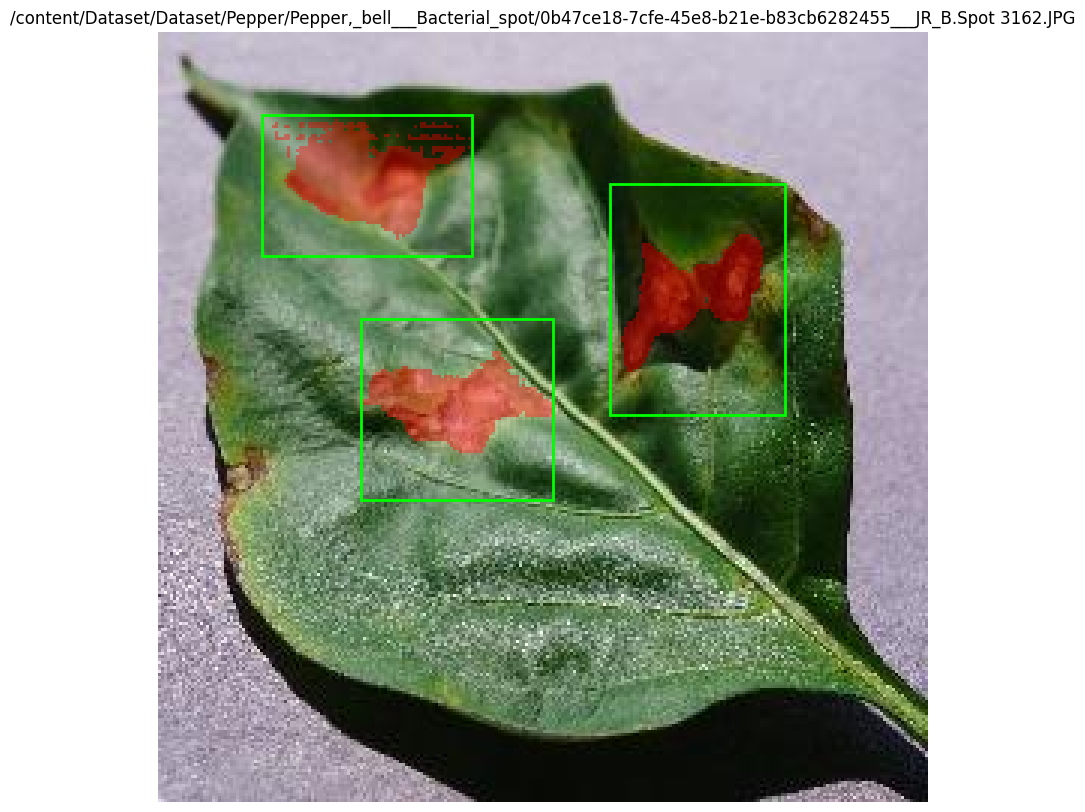

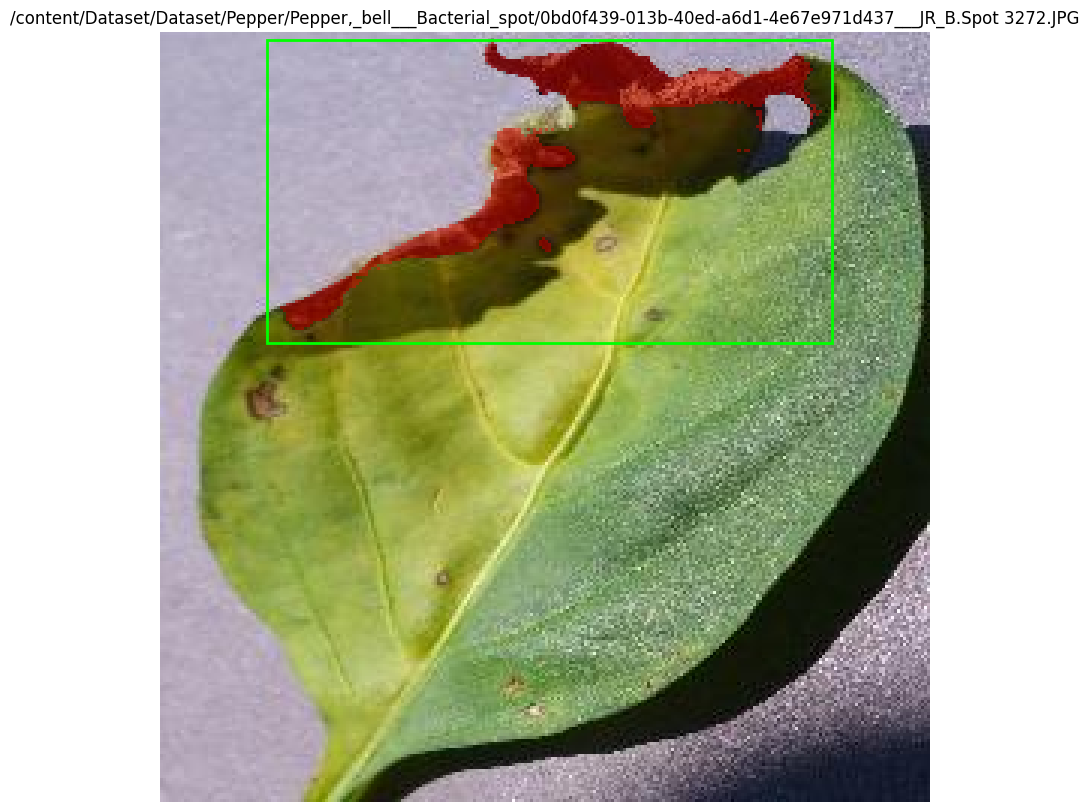

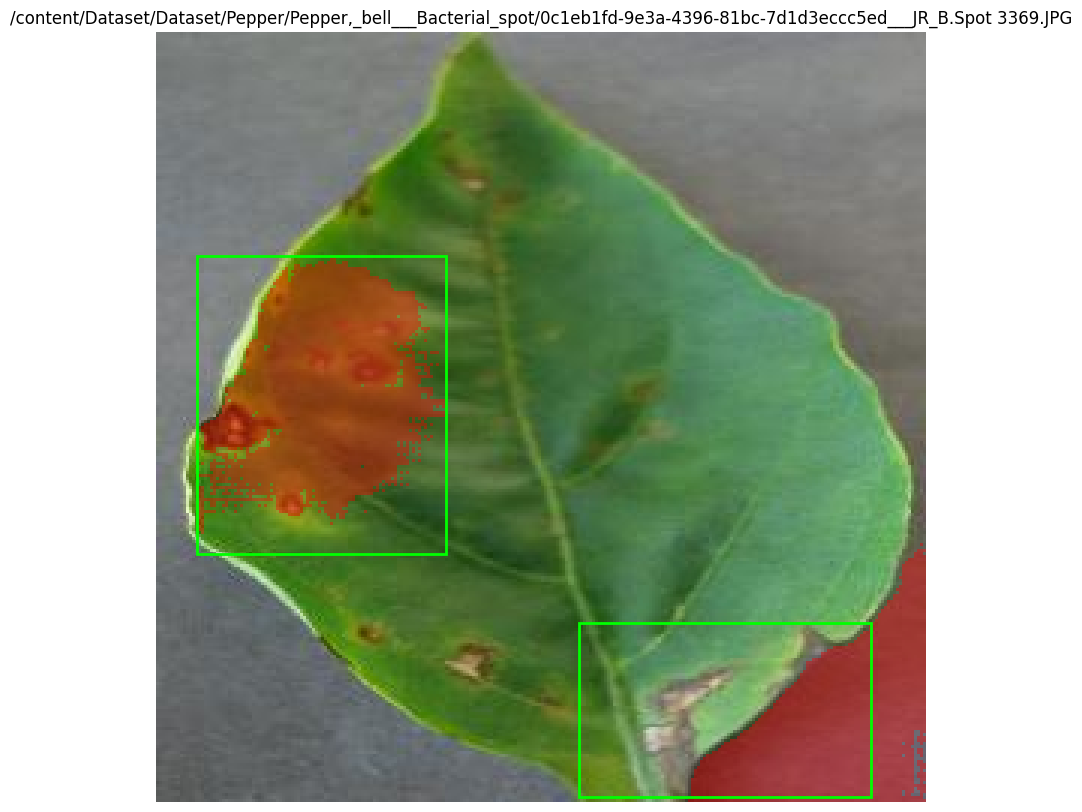

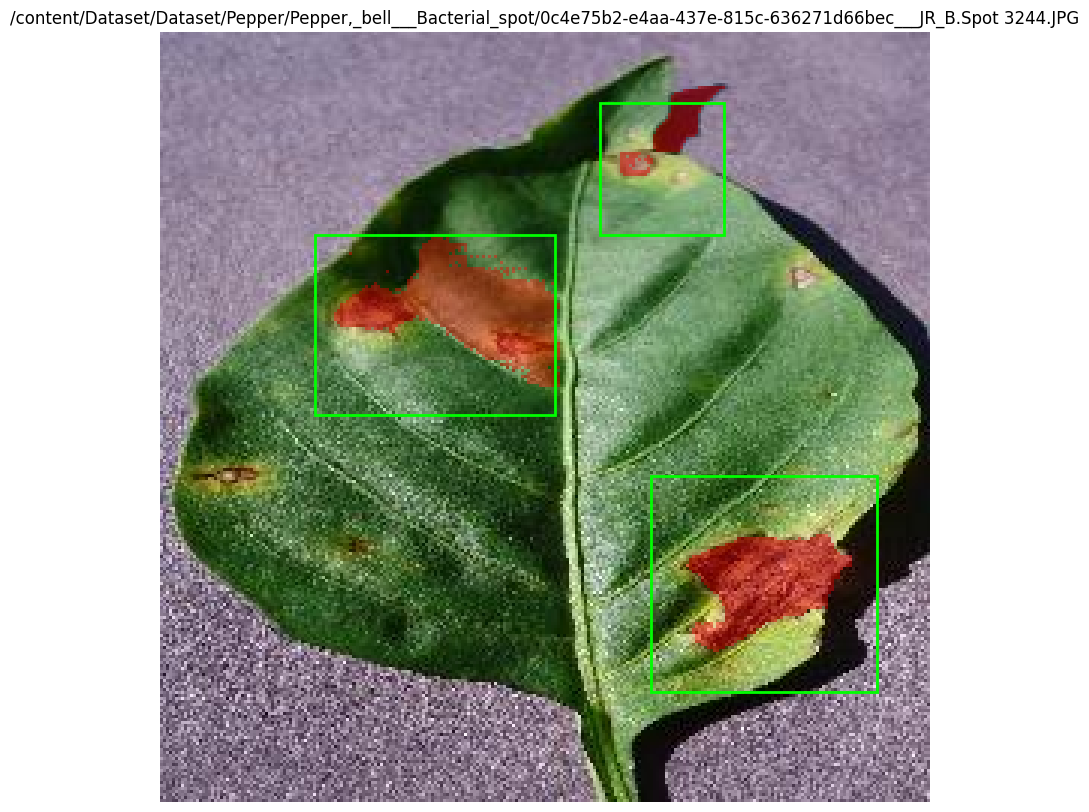

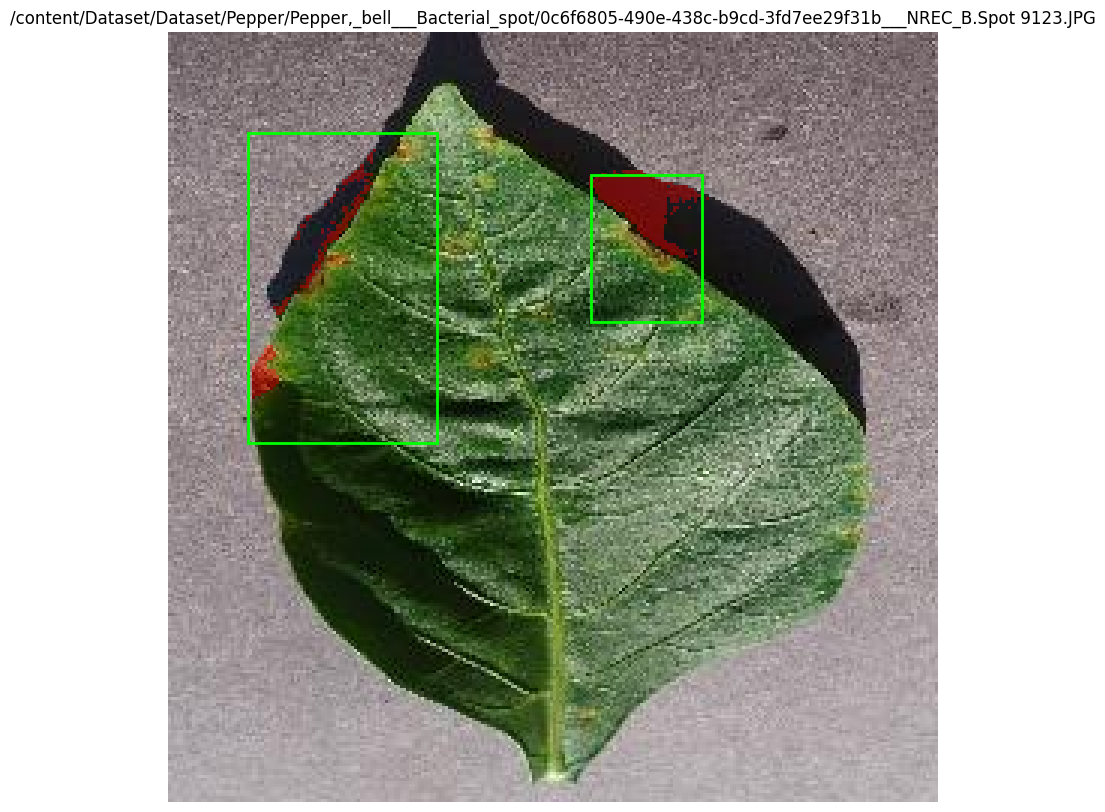

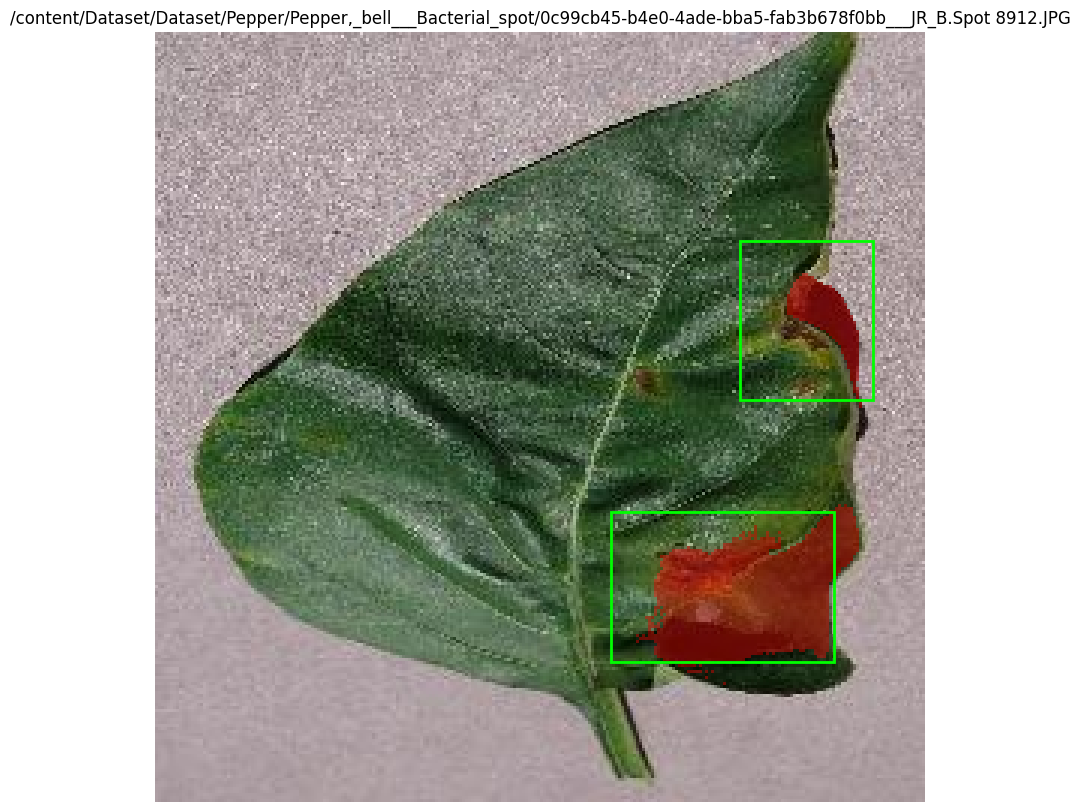

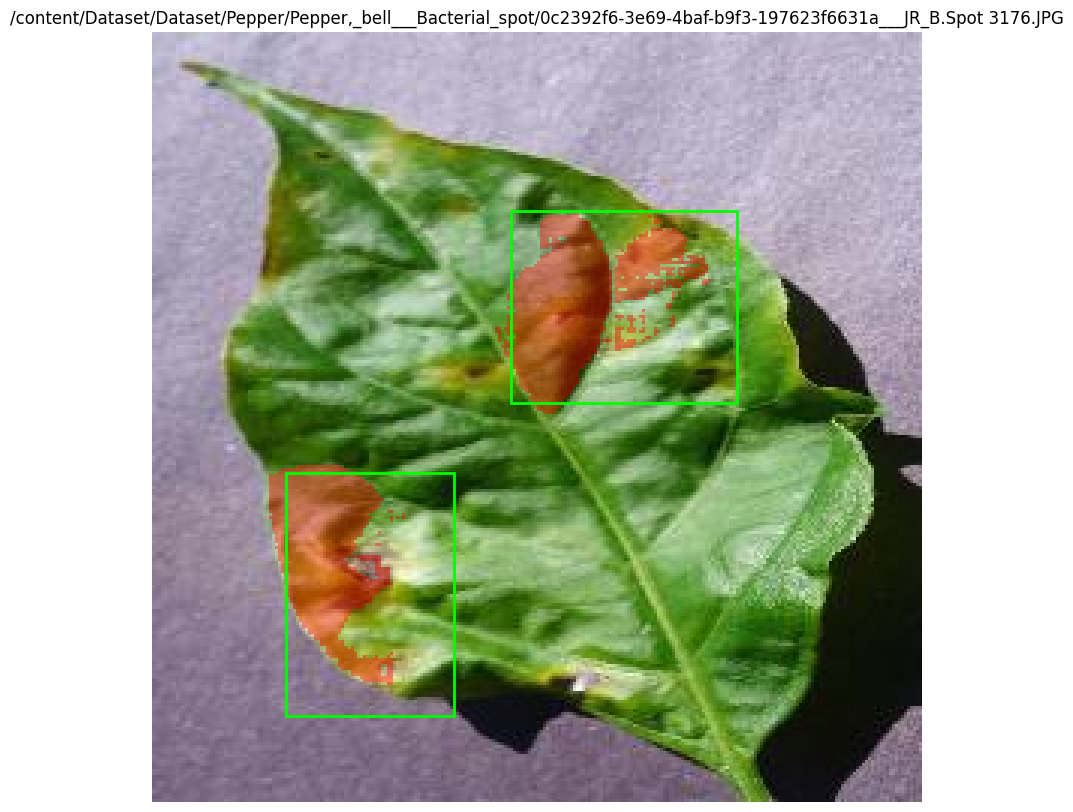

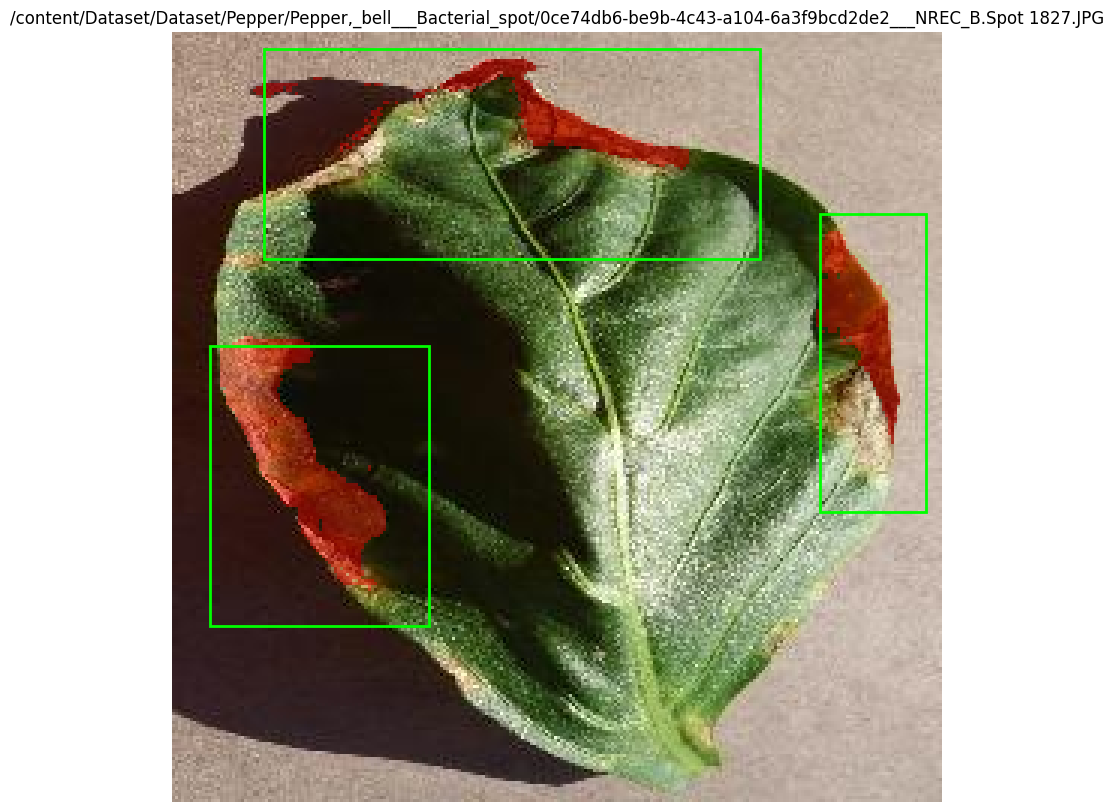

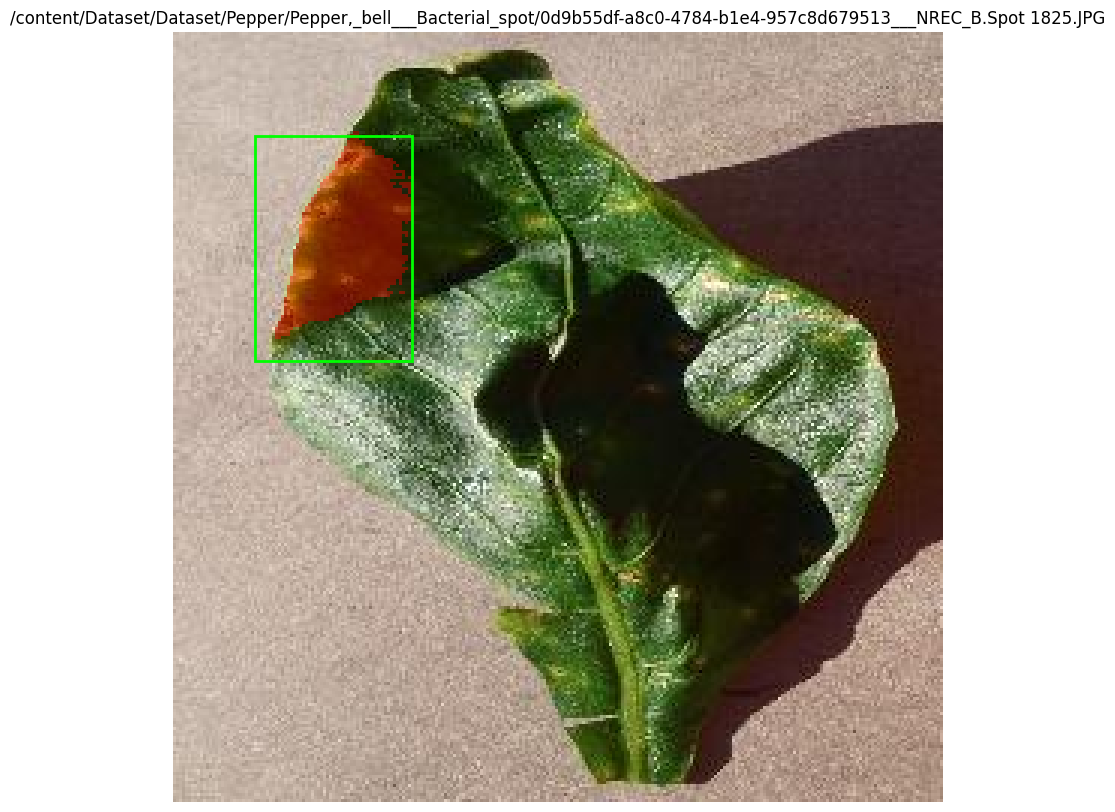

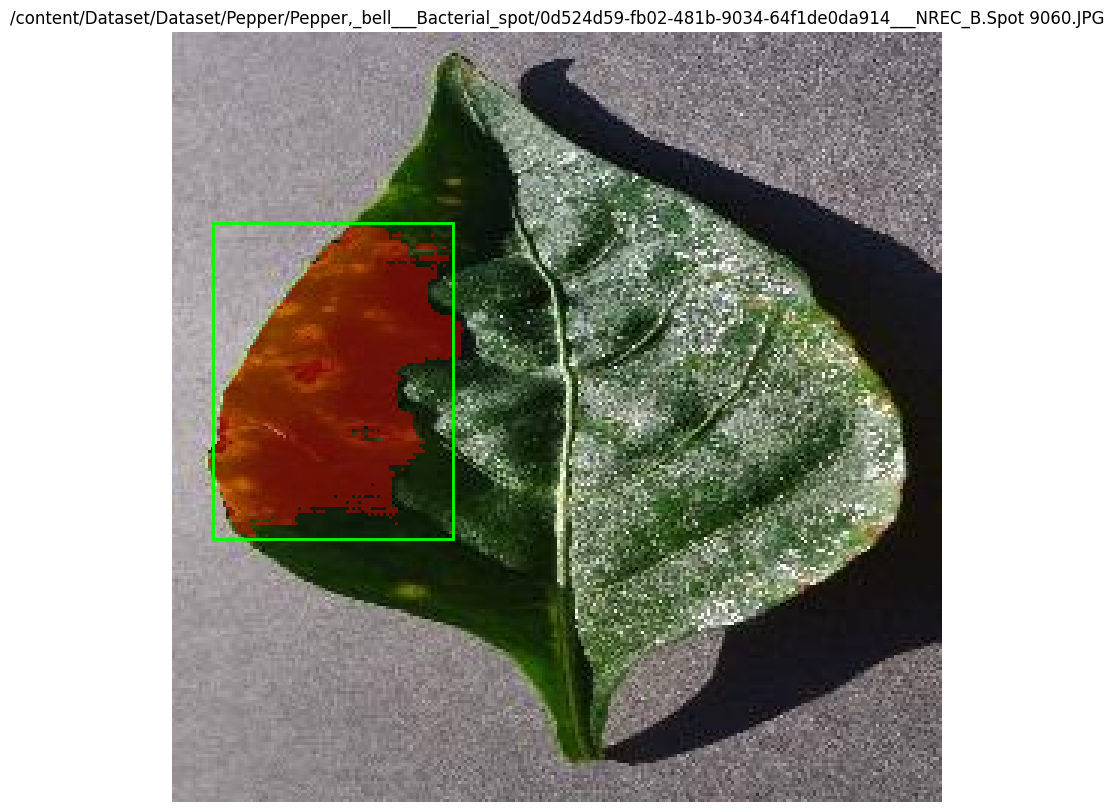

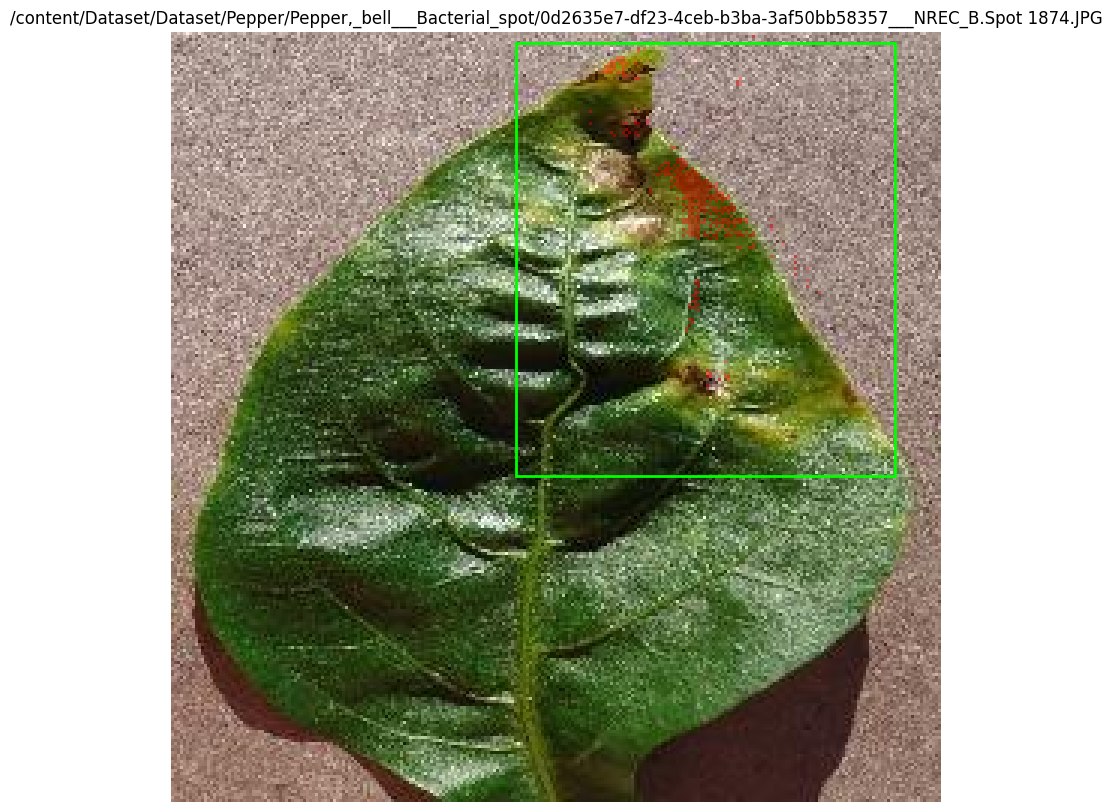

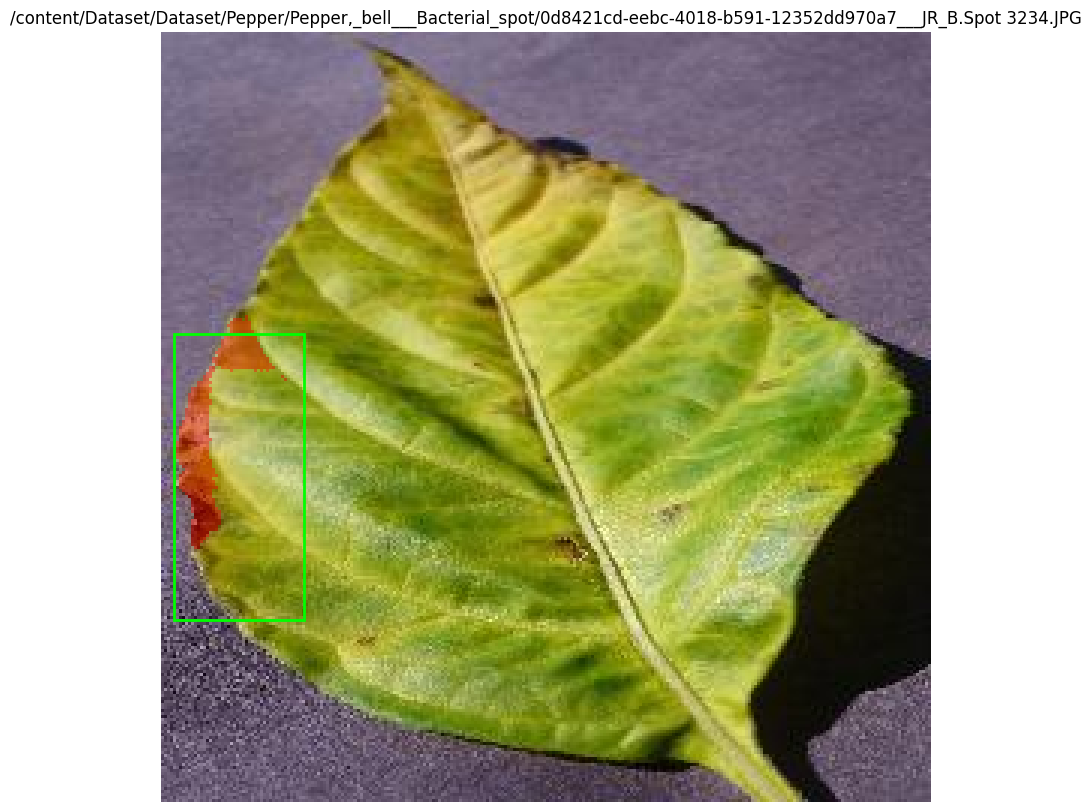

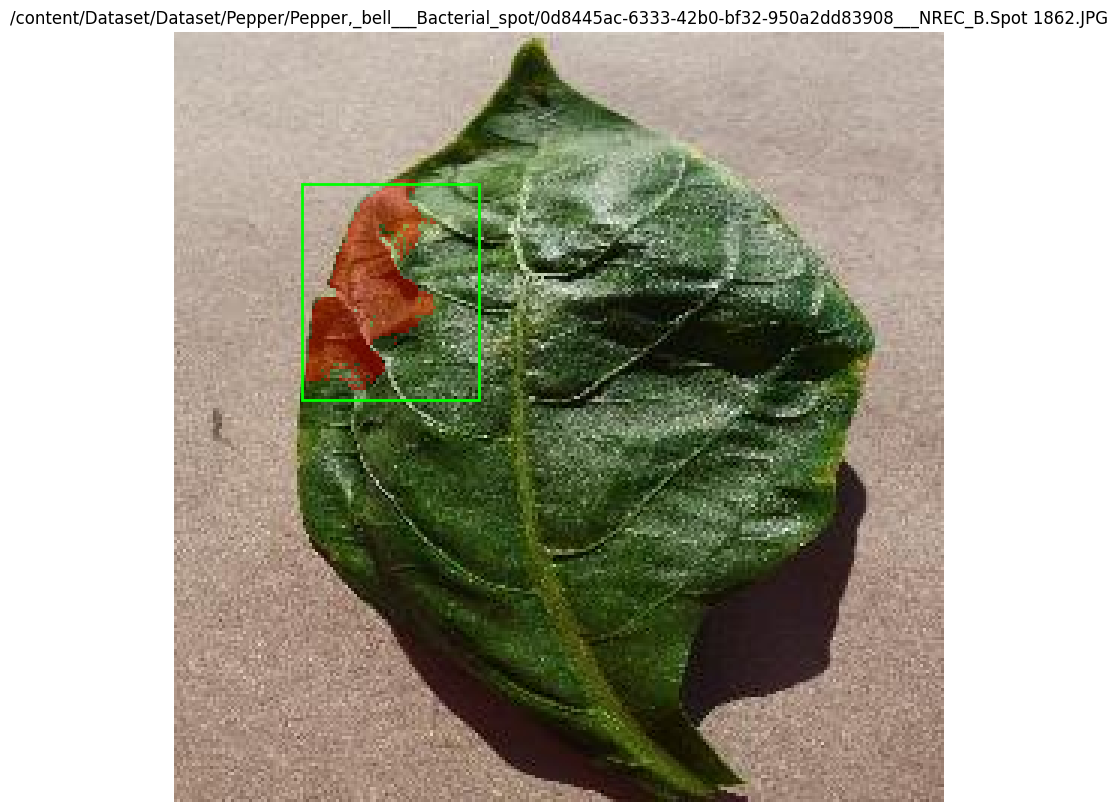

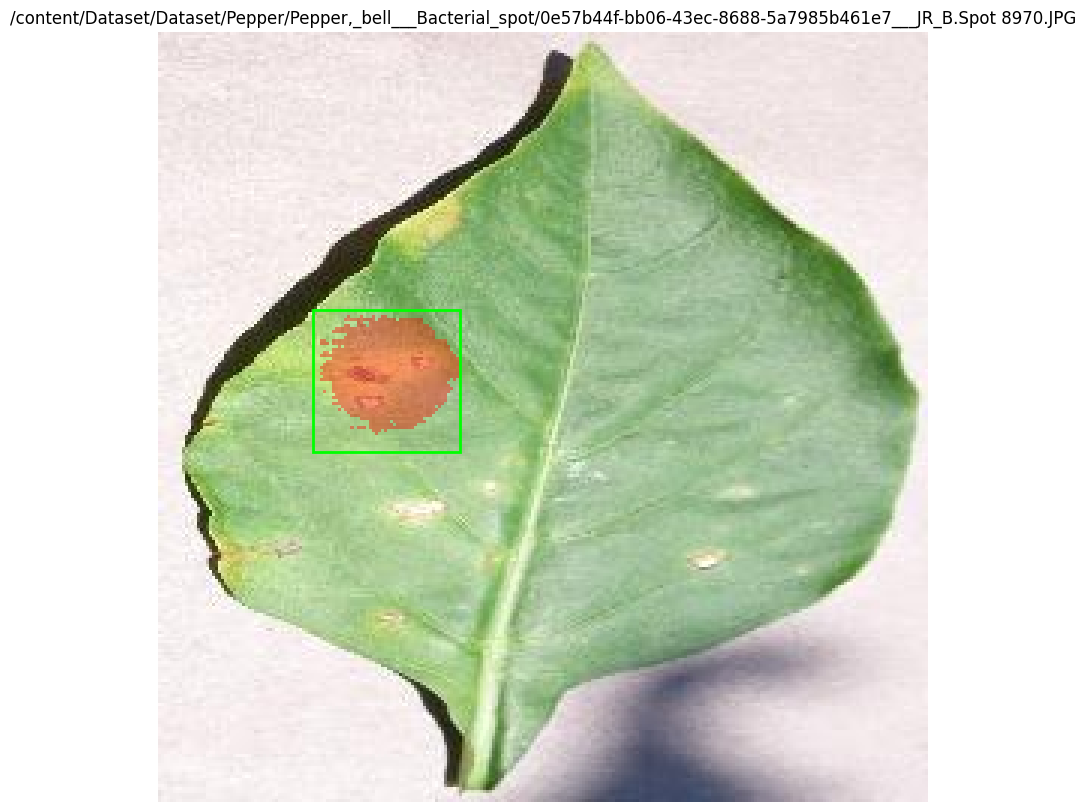

In [ ]:
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from pycocotools import mask as maskUtils

# Load the JSON file
json_path = "/content/coco_with_masks_clean2.json"  # replace with your file path
with open(json_path) as f:
    coco = json.load(f)

# Build index for quick lookup
image_id_to_filename = {img["id"]: img["file_name"] for img in coco["images"]}
ann_by_image = {}
for ann in coco["annotations"]:
    ann_by_image.setdefault(ann["image_id"], []).append(ann)

for i, img_info in enumerate(coco["images"][:20]):
    img_id = img_info["id"]
    img_filename = img_info["file_name"]
    img_path = img_filename

    # Load image
    image = cv2.imread(img_path)
    if image is None:
        print(f"Image not found: {img_path}")
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()
    plt.title(f"{img_filename}", fontsize=12)

    # Draw bounding boxes and masks
    for ann in ann_by_image.get(img_id, []):
        # Bounding box
        x, y, w, h = ann["bbox"]
        rect = Rectangle((x, y), w, h, linewidth=2, edgecolor='lime', facecolor='none')
        ax.add_patch(rect)

        # Decode and draw RLE mask
        if isinstance(ann["segmentation"], dict):
            mask = maskUtils.decode(ann["segmentation"])
            rgba_mask = np.zeros((*mask.shape, 4), dtype=np.uint8)
            rgba_mask[mask == 1] = [255, 0, 0, 100]  # Red mask with alpha
            plt.imshow(rgba_mask)

    plt.axis('off')
    plt.show()


In [ ]:
image = cv2.imread(img_filename)


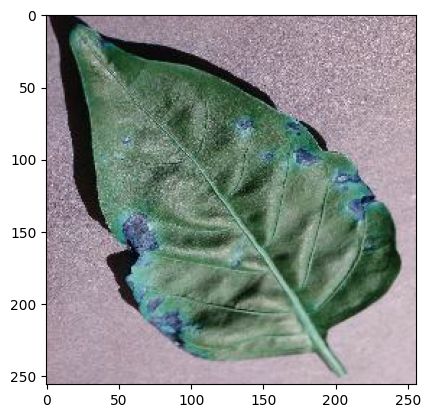

In [ ]:
plt.imshow(image)


In [ ]:
print("Image path:", img_path)
print("Exists:", os.path.exists(img_path))


Image path: /content/images//content/Dataset/Dataset/Pepper/Pepper,_bell___Bacterial_spot/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG
Exists: False


In [ ]:
/content/Dataset/Dataset/Pepper/Pepper,_bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG